In [1]:

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import pandas

%matplotlib inline

In [2]:
## Lets look at the numbers, yet again.  
##This time, we only look at X, and throw away the y
digits = datasets.load_digits()

X = digits['data']

## We won't look at this until the end:
Y = digits['target']

In [3]:
## Getting my survey
survey = pandas.read_csv("data\Clean_Survey_2022-01-16.csv") 

##It's never a bad idea to look at stuff along the way
#survey.head(3)

##df stands for data.frame -> the pandas structure
df = survey[["Age", "Height", "Weight."]]

df.head(5)

,Age,Height,Weight.
0,22.0,177.80,110.0
1,24.0,175.00,63.0
2,24.0,182.88,100.0
3,34.0,NaN,61.3
4,24.0,160.00,54.0


In [4]:
##Let's look at our summary statistics!

df.describe()

,Age,Height,Weight.
count,138.000000,129.000000,135.000000
mean,27.376812,171.073256,78.799852
std,7.936981,10.358830,45.163298
min,10.000000,150.000000,45.000000
25%,23.000000,164.000000,60.000000
50%,25.000000,170.180000,70.000000
75%,30.000000,180.000000,84.000000
max,90.000000,195.580000,506.000000


In [6]:
##Very differnet...  distance will be dominates be Height!

##we can quickly fix things with a lambda function
df2=df.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

df2.head()

,Age,Height,Weight.
0,-0.679906,0.651905,0.693403
1,-0.427003,0.380550,-0.351141
2,-0.427003,1.144219,0.471159
3,0.837512,NaN,-0.388923
4,-0.427003,-1.073135,-0.551160


In [8]:
##Let's summarize again!

df2.describe().round(4)


,Age,Height,Weight.
count,138.0000,129.0000,135.0000
mean,-0.0000,-0.0000,-0.0000
std,1.0036,1.0039,1.0037
min,-2.1973,-2.0423,-0.7512
25%,-0.5535,-0.6855,-0.4178
50%,-0.3006,-0.0866,-0.1956
75%,0.3317,0.8651,0.1156
max,7.9188,2.3750,9.4942


In [1]:
## Cluster!
df3 = df2[["Age", "Height", "Weight."]].dropna()

df3.describe().round(4)




NameError: name 'df2' is not defined

In [49]:

cluster_3 = KMeans(n_clusters =3, random_state = 1)
cluster_3.fit(df3)

y_pred = cluster_3.fit_predict(df3)



Text(0.5, 1.0, 'Age to height')

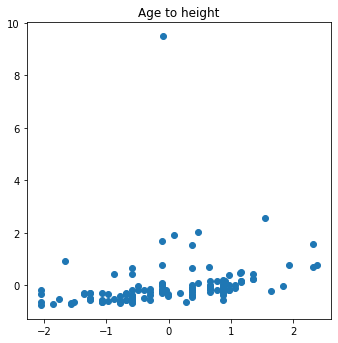

In [15]:
##draw it out

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 12))


plt.subplot(221)
plt.scatter(df3["Height"], df3["Weight."])#, c=y_pred)
plt.title("Age to height")